# LetsGrowMore Data Science Internship (VIP)
## Name: Kajal Kashyap

## Title: Iris Flowers Classification ML Project

## Batch: March

# Step 1:Data Collection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
df=pd.read_csv("C:/Users/Mehvish/Downloads/iris.csv")

In [3]:
df

,sepal length,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal length,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df=df.replace({'species':{'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3}})
df.head()

,sepal length,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length        150 non-null    float64
 1    sepal width in cm  150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   species             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Step2: Checking nulls

In [7]:
df.isnull()

,sepal length,sepal width in cm,petal length in cm,petal width in cm,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.columns

Index(['sepal length', ' sepal width in cm', 'petal length in cm',
       'petal width in cm', 'species'],
      dtype='object')

## Step 3: Understanding Data

In [9]:
df.describe()

,sepal length,sepal width in cm,petal length in cm,petal width in cm,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [10]:
df.nunique

<bound method DataFrame.nunique of      sepal length   sepal width in cm  petal length in cm  petal width in cm  \
0             5.1                 3.5                 1.4                0.2   
1             4.9                 3.0                 1.4                0.2   
2             4.7                 3.2                 1.3                0.2   
3             4.6                 3.1                 1.5                0.2   
4             5.0                 3.6                 1.4                0.2   
..            ...                 ...                 ...                ...   
145           6.7                 3.0                 5.2                2.3   
146           6.3                 2.5                 5.0                1.9   
147           6.5                 3.0                 5.2                2.0   
148           6.2                 3.4                 5.4                2.3   
149           5.9                 3.0                 5.1                1.8   

    

In [11]:
df.species

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [106]:
x=np.array(df.iloc[:,3]).reshape(-1,1)
y=np.array(df.iloc[:,-1]).reshape(-1,1)


In [107]:
x

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [108]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
    

In [109]:
cor=df.corr()
cor

,sepal length,sepal width in cm,petal length in cm,petal width in cm,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.460039
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.649101
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.580749
species,0.460039,-0.612165,0.649101,0.580749,1.000000


## Step 4: Data Visualization


### Heatmap

<AxesSubplot:>

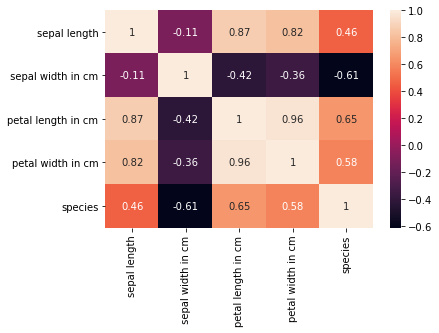

In [110]:
sns.heatmap(cor,annot=True)

In [111]:
df.sample

<bound method NDFrame.sample of      sepal length   sepal width in cm  petal length in cm  petal width in cm  \
0             5.1                 3.5                 1.4                0.2   
1             4.9                 3.0                 1.4                0.2   
2             4.7                 3.2                 1.3                0.2   
3             4.6                 3.1                 1.5                0.2   
4             5.0                 3.6                 1.4                0.2   
..            ...                 ...                 ...                ...   
145           6.7                 3.0                 5.2                2.3   
146           6.3                 2.5                 5.0                1.9   
147           6.5                 3.0                 5.2                2.0   
148           6.2                 3.4                 5.4                2.3   
149           5.9                 3.0                 5.1                1.8   

     sp

### Box  Plot

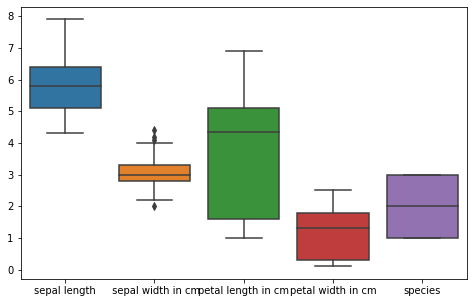

In [112]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.show()

### Pairplot Graph

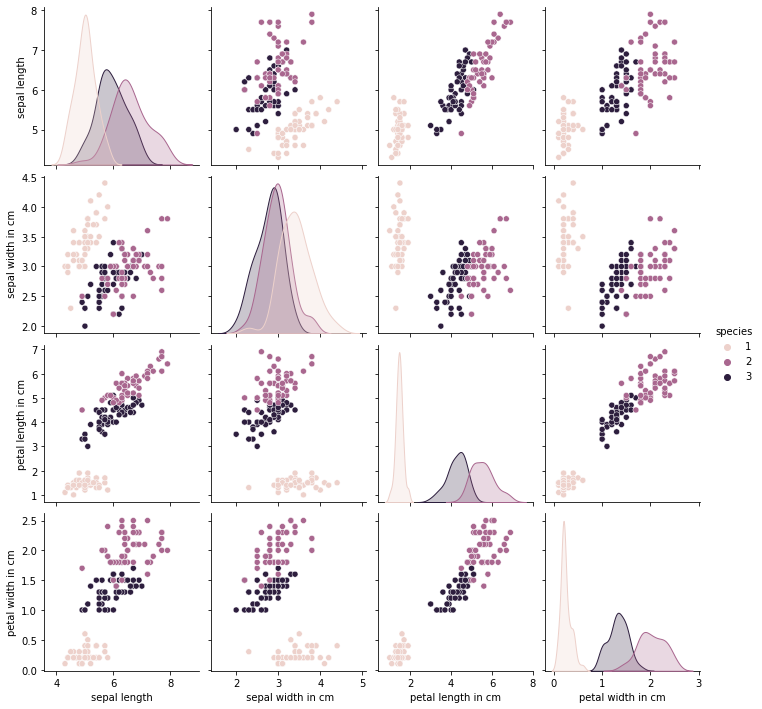

In [113]:
sns.pairplot(df,hue='species')

## Step 6:Model Building

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [116]:
x_train.shape

(120, 1)

In [117]:
#from sklearn.linear_model import LinearRegression

In [118]:
#lr=LinearRegression()

In [119]:
#lr.fit(x_train,y_train)

In [120]:
y_predict=lr.predict(x_test)

In [121]:
y_predict

array([[0.2],
       [1.1],
       [1.4],
       [0.4],
       [2. ],
       [1.6],
       [2.3],
       [0.4],
       [0.2],
       [2.3],
       [1.3],
       [0.4],
       [2.1],
       [1.5],
       [1.5],
       [0.2],
       [1.2],
       [1.5],
       [0.4],
       [0.2],
       [1.2],
       [1.5],
       [1.7],
       [0.3],
       [1.8],
       [1.3],
       [0.2],
       [0.3],
       [1.2],
       [1.9]])

In [122]:
from sklearn.svm import SVC

In [123]:
classifier=SVC(kernel='linear',random_state=0)

In [124]:
classifier.fit(x_train,y_train)

C:\Users\Mehvish\anaconda3\aa\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', random_state=0)

In [125]:
#from sklearn.metrics import confusio




In [126]:
#confusion_matrix(y_test,y_predict)

In [127]:
#from sklearn.metrics import r2_score

In [128]:
#r2_score=lr.score(y_test,y_predict)
#print(r2_score*100,'%')

In [129]:
y_predict=classifier.predict(x_test)

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  2, 11]], dtype=int64)

In [132]:
from sklearn.metrics import r2_score

In [133]:
r2_score=lr.score(y_test,y_predict)
print(r2_score*100,'%')

90.90909090909089 %
